--------------------------------------------------------
# Chapters #
---------------------------------------------------------
* Setting up imports and dataset
* Creating Helper Functions
* Demographic Analysis
* Experiences with the Hum
* Symptoms Analysis
* Pre-emptive Factors Analysis
* Considerations and Conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as scs

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("/kaggle/input/world-hum-map/hummap_processed.csv")
df.drop(columns=["Unnamed: 0"],
       inplace=True)

warnings.simplefilter("ignore")

# Create a 'count' variable which can be used for summing in later functions
df["count"] = 1  # Set to 1 for all rows.

### Creating some additional useful columns

In [3]:
# Create a 'count' variable which can be used for summing in later functions
df["count"] = 1  # Set to 1 for all rows]


# Create an agegroup variable
df["age_group"] = pd.cut(df["age"],
                        [0,25, 35, 45, 55, 65, 75, 150],
                        labels=["0-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76+"])

### Create some helper functions: ##

In [4]:
def generate_hist(df, var, stat, hue_var=None, annots=None, ax=None):
    """
    Generate a histogram of a single variable in df including: a median line, a relevant title and axes labels,
    and annotated skew and kurtosis

    Optional hue_var variable if you want to hue by a variable.
    Optional annots variable to hide the annotations on plot
    Optional ax variable to place the plot on an ax so can put in a grid of plots.
    """
    try:
        stats = generate_descriptive_stats(df, var)
        median, kurtosis, skew = stats["median"], stats["kurtosis"], stats["skew"]
    except:
        median, kurtosis, skew = None, None, None
    #median, kurtosis, skew = stats["median"], stats["kurtosis"], stats["skew"]
    var_title = var.replace("_", " ").replace("{\'", "").replace("\'}","").strip("{").strip("}")

    # Create plot
    hist = sns.histplot(data=df,
                        x=var,
                        stat=stat,
                        hue=hue_var,
                        kde=True,
                        multiple="stack",
                        ax=ax)
    # Add title and axes titles
    plt.title(f"Variation in {var} across all respondents",
              fontweight="bold")
    plt.xlabel(var_title.title())
    plt.ylabel(stat.title())

    # Add additional annotations - median line, kurtosis and skew annotations - only if annots is not None
    if annots is not None:
        plt.axvline(x=median,
                    label=f"Median {var}",
                    linestyle="dashed")
    
        pct_80x, pct_60y = (df[var].max() / 100) * 80, (np.argmax(np.histogram(df[var])[0]) / 100) * 60
        
        plt.text(x=pct_80x,
                 y=pct_60y,
                 s=f"Kurtosis: {str(round(kurtosis, 3))}")
    
        plt.text(x=pct_80x,
                 y=(pct_60y-5),
                 s=f"Skew: {str(round(skew, 3))}")

    plt.legend()
    plt.tight_layout()
    plt.show()

    return hist

    



def generate_descriptive_stats(df, var):
    """
    Generate and return a dictionary containing descriptive statistics for a single continuous variable column of the df.
    """
    arr = np.array(df[var])
    stats_dict = {"kurtosis": scs.kurtosis(arr),
                  "skew": scs.skew(arr),
                  "std": np.median(arr),
                  "median": np.median(arr),
                  "mean": np.mean(arr)}
    return stats_dict





# Generate a Word Cloud function
def process_and_generate_wordcloud(df, col, title, repeat):
    stopwords = set(STOPWORDS)
    comment_words = []
    for response in df[col]:
        comment_words.append(str(response.lower()))

    comment_words = str(comment_words)
    
    

    if repeat in ["yes", "y", "repeat", True]:
        wordcloud = WordCloud(width=800,
                              height=800,
                              background_color="white",
                              stopwords=stopwords,
                              min_font_size=2,
                              max_words = 350,
                              repeat=True).generate(comment_words)
    else:
        wordcloud = WordCloud(width=800,
                              height=800,
                              background_color="white",
                              stopwords=stopwords,
                              min_font_size=2,
                              max_words = 350,
                              repeat=False).generate(comment_words)
        
    

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"{title}",
             fontweight="bold")
 
    plt.show()



# Create a predefined grid of plots
def grid_of_plots(df, nrows, ncols, hist_x, hist_y, plot_vars, hist_hue=None):
    """
    df = dataframe (filtered already if you want this)
    nrows: Number of rows in the grid
    ncols: Number of columns in the grid
    hist_x: X-axis column for each histogram plot
    hist_y: Y-axis column for each histogram plot
    plot_vars: List of variables to loop through, creating a separated histogram for each
    hist_hue: Hue for each histogram if desired
    """
    fig, ax = plt.subplots(nrows=nrows,
                           ncols=ncols,
                           sharex=True,
                           sharey=True)
    
    
    fig.set_size_inches(18,8)
    
    row=0
    col=-1
    for column in plot_vars:
        col+=1
        if col>ncols-1:
            row+=1
            col=0
        ax[row,col] = sns.histplot(df,
                                   x=hist_x,
                                   stat="count",
                                   hue= hist_hue,
                                   ax=ax[row,col])
        ax[row,col].set_title(f"{column}",
                             fontweight="bold")
        ax[row,col].set_xlabel(hist_x)
    
    plt.suptitle("Key Symptoms by Gender and Age Group",
                fontweight="bold")
    plt.tight_layout()   

-------------------------------------------------------------------
# Demographics - Who is affected by the Hum?
--------------------------------------------------------------------

### Age only

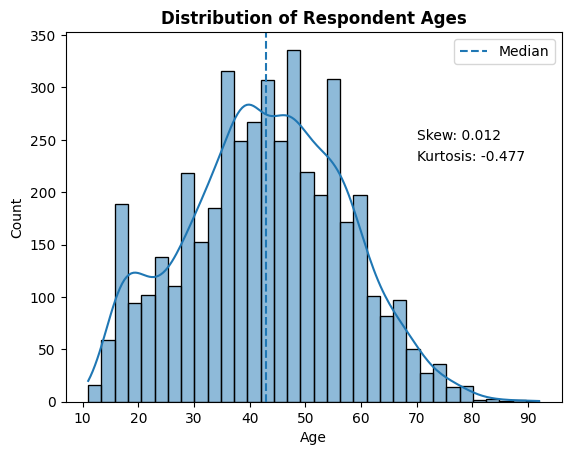

In [5]:
# Generate Stats
age_median = np.median(np.array(df["age"]))
age_kurtosis = scs.kurtosis(np.array(df["age"]))
age_kurtosis_test = scs.kurtosistest(np.array(df["age"]),
                                      nan_policy="omit")
age_skew = scs.skew(np.array(df["age"]))

# Generate Plot
age_plot = sns.histplot(data=df,
                        x="age",
                        stat="count",
                        kde=True)

# Add median age dashed vertical line
plt.axvline(x=age_median,
           linestyle="dashed",
           label="Median")

# Add title, fix x-axis
plt.title("Distribution of Respondent Ages",
         weight="bold")
plt.xlabel("Age")


# Add the skew value
plt.text(x=70,
         y=250,
         s=f"Skew: {str(round(age_skew, 3))}")

# Add the kurtosis value
plt.text(x=70,
         y=230,
         s=f"Kurtosis: {str(round(age_kurtosis, 3))}")

# Add legend and display
plt.legend()
plt.show()

### Observations:
* A nearly normal distribution, aside from a spike created by high response rates from the 18-30 age group. However, due to the high middle-aged response rate, the data is slightly skewed towards older ages.
* Middle-aged was the most common age group - perhaps this is the result of a common age group with internet skills and perhaps more likely impacted hearing or health conditions.
* With a kurtosis of -0.477, the distribution is **platykurtic** with a relatively flat peak and few extreme outliers. It is not normalally distributed

### Age and gender?

Text(0.5, 0.98, 'Distribution of Respondent Ages by Gender')

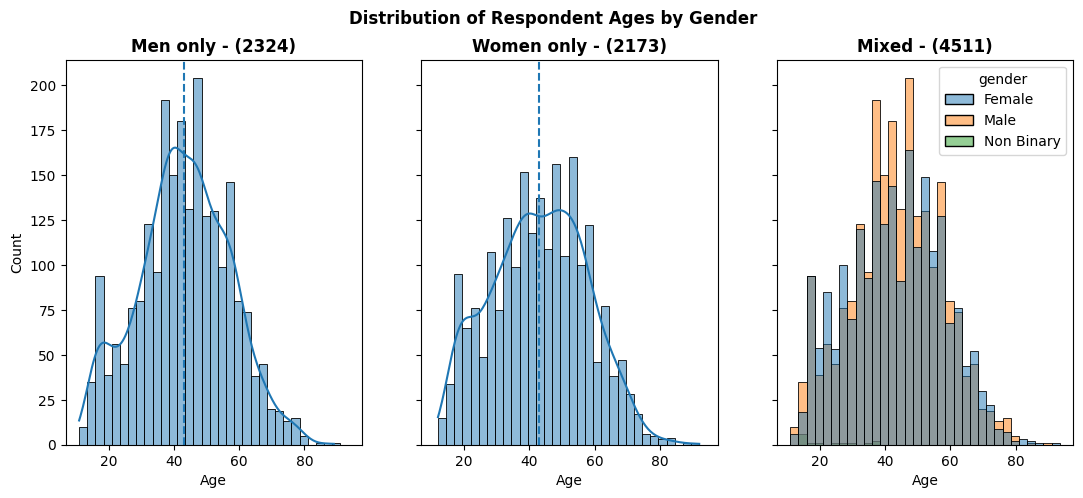

In [6]:
# Create 1x3 subplots
fig, ax = plt.subplots(nrows=1,
                       ncols=3,
                       sharex=True,
                       sharey=True)

# Set larger size plot
fig.set_size_inches(13, 5)

# Men only df and plot
men_df = df[df["gender"]=="Male"]

sns.histplot(data=men_df,
             x="age",
             stat="count",
             kde=True,
             ax=ax[0],
             binwidth=2.5)
ax[0].set_title(f"Men only - ({len(men_df)})",
                fontweight="bold")
ax[0].axvline(x=np.median(men_df["age"]),
              linestyle="dashed")


# Women only df and plot
female_df = df[df["gender"]=="Female"]

sns.histplot(data=female_df,
             x="age",
             stat="count",
             kde=True,
             ax=ax[1],
             binwidth=2.5)
ax[1].set_title(f"Women only - ({len(female_df)})",
                fontweight="bold")
ax[1].axvline(x=np.median(female_df["age"]),
              linestyle="dashed")


# All genders df and plot - overlayed colours
sns.histplot(data=df,
             x="age",
             hue="gender",
             stat="count",
             ax=ax[2],
             binwidth=2.5)
ax[2].set_title(f"Mixed - ({len(df)})",
                fontweight="bold")

# Set xlabel to 'Age' in all plots.
for ax in ax:
    ax.set_xlabel("Age")

plt.suptitle("Distribution of Respondent Ages by Gender",
             fontweight="bold")



<div class="alert alert-block alert-info">
<h3>Observations</h3>
    <li> More men than women responded to the survey. This conflicts with reports women are more likely to hear the noise. Perhaps men are more likely to look for alternative sources of the noise over medical help</li>
    <li> Middle-aged is the most common age group for men and women</li>
<li> Both men and women had a large spike in respondents in 18-22 age range</li>
<li>More women responded in the 18-30 range than men</li>
<li>Both genders exhibit a negative skew. Presumably this is because older age groups are less likely to research and participate in an online study such as this</li>
</div>

### Location, age and gender

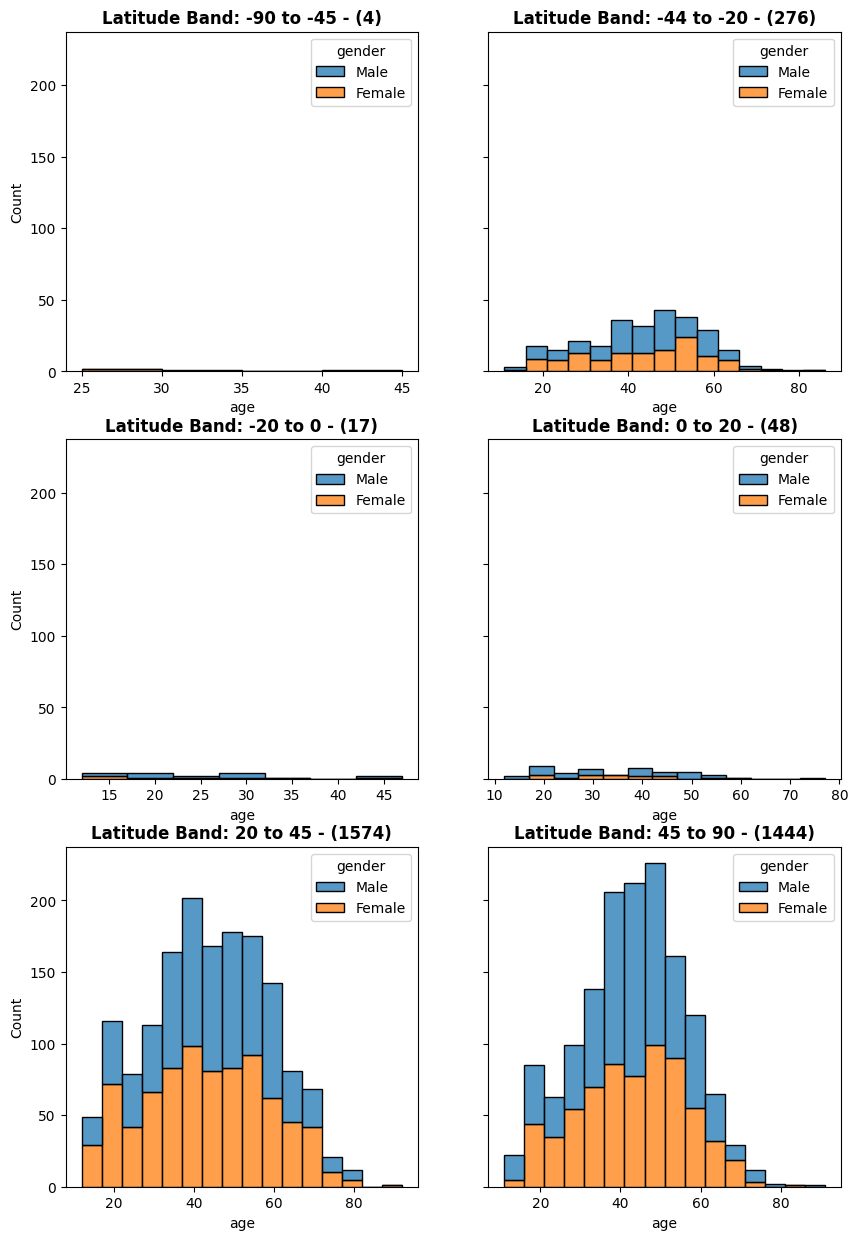

In [7]:
# Note - excluding  the 'Unknown' positions (~1200)
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True, figsize=(10, 15))

latitude_categories = ["-90 to -45", "-44 to -20", "-20 to 0", "0 to 20", "20 to 45", "45 to 90"]

for i, category in enumerate(latitude_categories):
    row, col = divmod(i, 2)  # Calculate row and column indices
    sns.histplot(data=df[df["latitude_band"] == category],
                 x="age",
                 hue="gender",
                 stat="count",
                 ax=ax[row, col],
                 binwidth=5,
                 hue_order=["Male", "Female"],
                 multiple="stack")
    ax[row,col].set_title(f"Latitude Band: {latitude_categories[i]} - ({str(len(df[df['latitude_band'] == category]))})",
                 fontweight="bold")



<div class="alert alert-block alert-info">
<h3>Observations</h3>
<li>There are far more observations in the northern vs Southern Hemisphere. This is an undercoverage bias - The global South has a *generally* lower level of development, with less access to the internet compared to the northern hemisphere. This does not necessarily suggest the phenomena is more common in the Northern Hemisphere.</li>
<li> There are unusually high numbers of middle-aged men reporting within the 45-90 latitude band, whereas younger women are prevalant in the 20-45 latitude band.</li>
<li>There are few observations around the equator.</li>
</div>

### Qualifications
Who is most likely to be affected by, and report this issue?

Text(0.5, 0, 'Age')

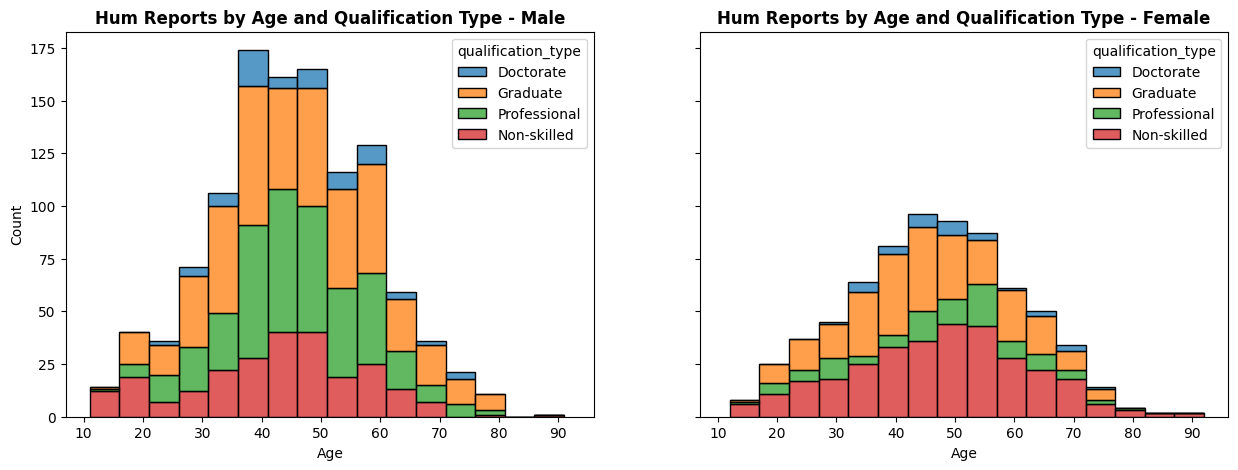

In [8]:
no_unknown_qual_df = df[df["qualification_type"]!="Unknown"]


fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(15,5)

ax[0] = sns.histplot(data=no_unknown_qual_df[no_unknown_qual_df["gender"]=="Male"],
                    x="age",
                    stat="count",
                    hue="qualification_type",
                    ax=ax[0],
                    binwidth=5,
                    hue_order=["Doctorate", "Graduate", "Professional", "Non-skilled"],
                     multiple="stack")

ax[1] = sns.histplot(data=no_unknown_qual_df[no_unknown_qual_df["gender"]=="Female"],
                    x="age",
                    stat="count",
                    hue="qualification_type",
                    ax=ax[1],
                    binwidth=5,
                    hue_order=["Doctorate", "Graduate", "Professional", "Non-skilled"],
                    multiple="stack")

ax[0].set_title("Hum Reports by Age and Qualification Type - Male",
               fontweight="bold")
ax[1].set_title("Hum Reports by Age and Qualification Type - Female",
               fontweight="bold")

ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")


<div class="alert alert-block alert-info">
<h3>Observations</h3>
<li>In Most Male age groups, Graduate and Professionals make up the bulk of the reports.</li>
<li>Across Men and Women, Doctorate is the smallest category.</li>
<li>Non-skilled constitute a greater proportion of the Female than Male demographic.</li>
</div>

#### What Relationships are between all demographic numeric variables?

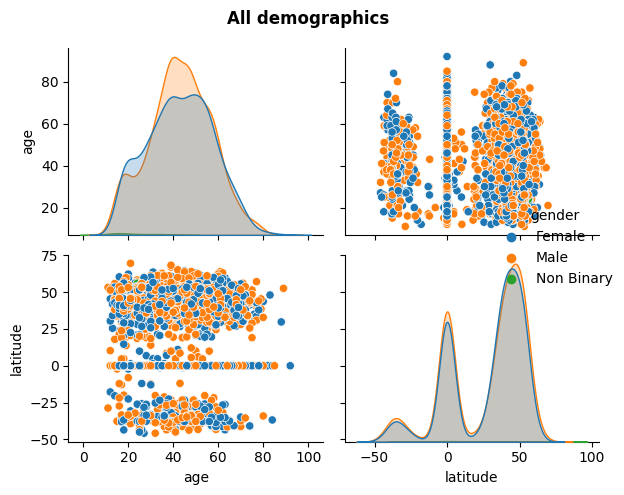

In [41]:
# Create a graphic of all numeric demographic variables using a pairplot:
all_demographics = sns.pairplot(data=df,
                                        hue="gender",
                                       vars=["age", "latitude"],
                               corner=False)
plt.suptitle("All demographics",
            fontweight="bold")
plt.tight_layout()

------------------------------------------------------------
# Experiences with the Hum
------------------------------------------------------------

### What does it Sound like?

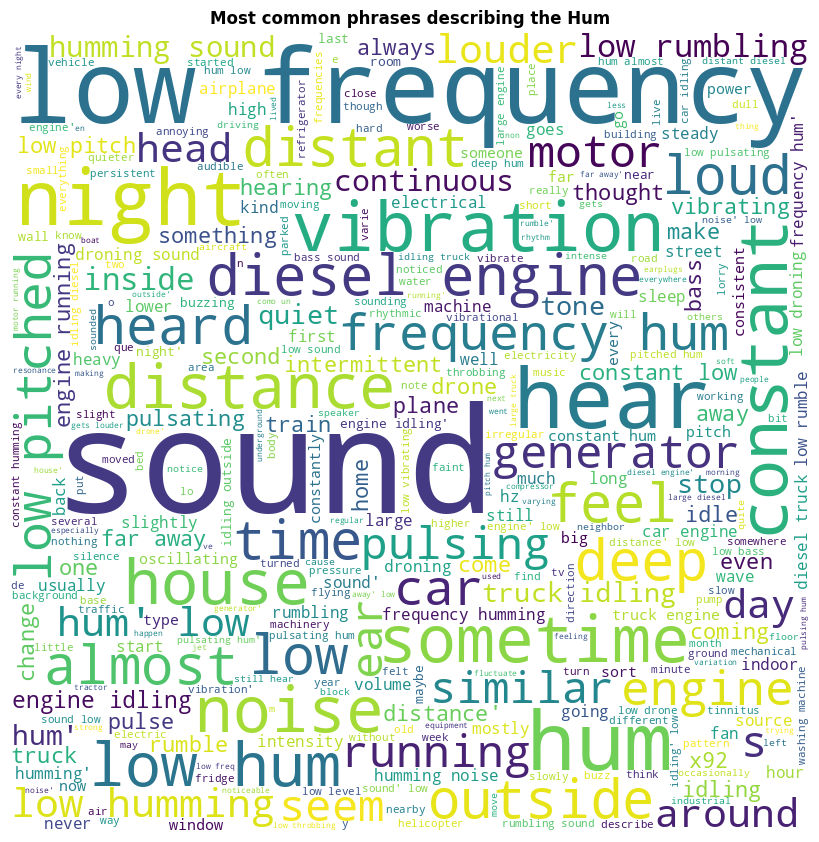

In [10]:
# Generate a word cloud of the sound_description column
process_and_generate_wordcloud(df,
                               "sound_desc_full",
                              "Most common phrases describing the Hum",
                              "no")
        

<div class="alert alert-block alert-info">
<h3>Observations</h3>
<li>'Engine', truck, 'car' or vehicle comes up frequently. There is lots of consistency in the sound experienced and relates to vehicular noise</li>
<li>Overwhelmingly described as a 'low' / 'deep' / droning noise. There are very few complaints of a high-pitched noise.</li>
<li>Vibration comes up frequently - lots of respondents seem to report a vibrating sensation alongside.</li>
<li>"Constant" comes up far more frequently than "changing" or variability etc. Seems to be very consistent in the people who experience it.</li>
</div>

### How loud is it?
Note, the noise_hertz column had lots of 'Unknowns' / missing / no hertz value estimated, these have been removed in below plots

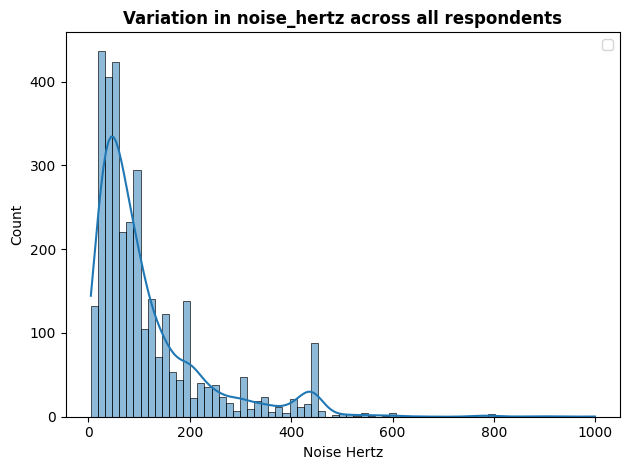

<Axes: title={'center': 'Variation in noise_hertz across all respondents'}, xlabel='Noise Hertz', ylabel='Count'>

In [11]:
# Create hertz dataframe where the unknown estimates are removed
df_hertz = df[~df["noise_hertz"].isin(["Unknown", np.nan])].reset_index(drop=True)

# Convert to float
df_hertz["noise_hertz"] = df_hertz["noise_hertz"].astype("float64")

# Calculate some descriptive statistics
hz_arr = np.array(df_hertz["noise_hertz"])
hertz_kurtosis = scs.kurtosis(hz_arr)
hertz_skew = scs.skew(hz_arr)
hertz_std = np.std(hz_arr)


generate_hist(df_hertz, "noise_hertz", "count")

<div class="alert alert-block alert-info">
<h3>Observations</h3>
    <li> Consistently reported as a low frequency noise, with a massive spike in the 20-100Hz range, and signficiant dropoff from there.</li>
    <li> Unusual outlier of reports at ~450 Hz, will investigate further below to see if there is a pattern as to who or where this is being reported</li>
</div>

##### Why is there a spike in reports at ~450 Hz?

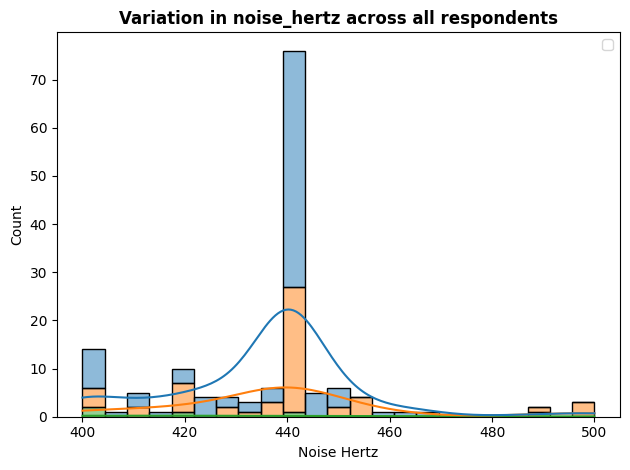

<Axes: title={'center': 'Variation in noise_hertz across all respondents'}, xlabel='Noise Hertz', ylabel='Count'>

In [12]:
high_hertz_df = df_hertz[df_hertz["noise_hertz"].between(400,500)]  # massive spike is it ~440-450Hz

# Where exactly is the spike, and is it linked to gender?
generate_hist(high_hertz_df, "noise_hertz", "count", "gender")

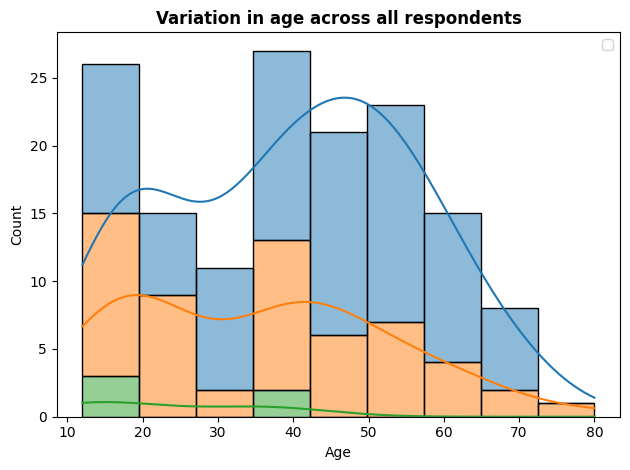

<Axes: title={'center': 'Variation in age across all respondents'}, xlabel='Age', ylabel='Count'>

In [13]:
# Is there some clear age/gender pattern?
generate_hist(high_hertz_df, "age", "count", "gender")

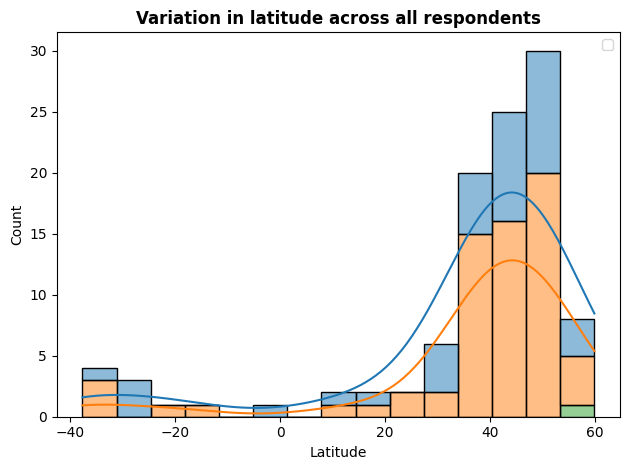

<Axes: title={'center': 'Variation in latitude across all respondents'}, xlabel='Latitude', ylabel='Count'>

In [14]:
# Is there some clear latitude or longitude pattern?
high_hertz_all_lat = high_hertz_df[~high_hertz_df["latitude"].isin([0, np.nan, "Unknown"])]
generate_hist(high_hertz_all_lat, "latitude", "count", "gender")

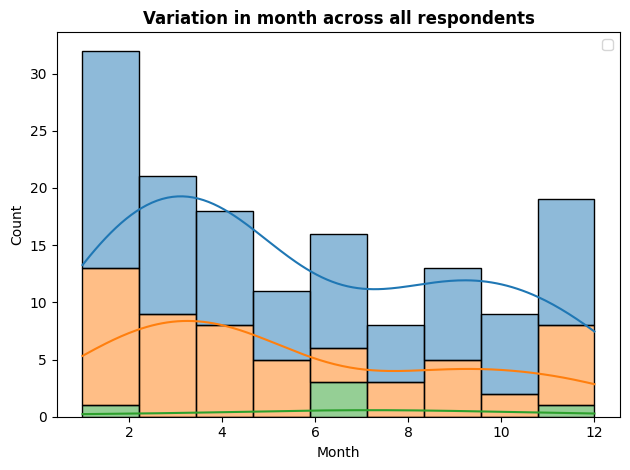

<Axes: title={'center': 'Variation in month across all respondents'}, xlabel='Month', ylabel='Count'>

In [15]:
# Is there a relationship with month and high hertz?
generate_hist(high_hertz_df, "month", "count", "gender")

<div class="alert alert-block alert-info">
<h3>Observations</h3>
    <li> Spike is focused very narrowly between 430-460Hz</li>
    <li> No clear difference between men and women responsible for the spike</li>
    <li> No clear difference in year timings when reported.</li>
    <li> Average age of those reporting the spike is slightly higher than the whole dataset average.</li>
</div>

#### When is the Hum heard?

* Day/night
* Season
* Weather
* Does this vary by gender, or hertz detected change?

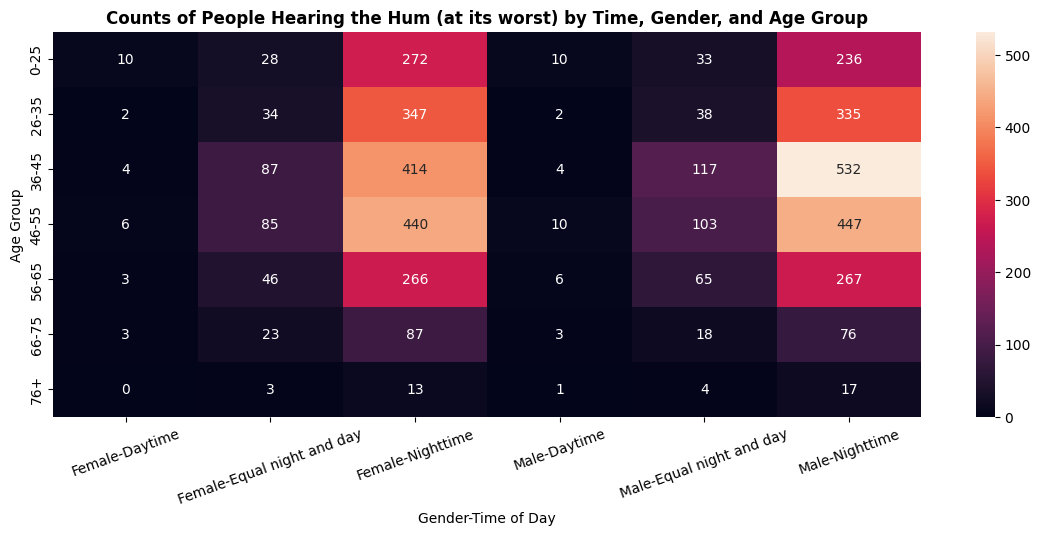

In [16]:
# Pivot the data on age_group, returning the sum of count (each row = 1) for each of the categories and over gender

# Remove non-binary for simplicity of chart
df_mf = df[df["gender"].isin(["Male", "Female"])]

heatmap_gender_age_when = df_mf.pivot_table(
    values='count', 
    index='age_group', 
    columns=['gender', 'when_loudest'], 
    aggfunc='sum'
)

fig=plt.figure()
fig.set_size_inches(14,5)
sns.heatmap(heatmap_gender_age_when, annot=True, fmt="d")#, cmap="YlGnBu")  # Use decimal format.
plt.title("Counts of People Hearing the Hum (at its worst) by Time, Gender, and Age Group",
         fontweight="bold")
plt.xlabel("Gender-Time of Day")
plt.ylabel("Age Group")
plt.xticks(rotation=20)
plt.show()

<div class="alert alert-block alert-info">
<h3>Observations</h3>
    <li> Men seem more likely to hear it worst during day and nighttime</li>
    <li> Male and female patterns very similar across age groups and time of day. Biggest difference is probably higher reporting amongst women of the youngest age group, and men being more reported in the 36-45 age group.</li>
</div>

#### Where is it heard worst?

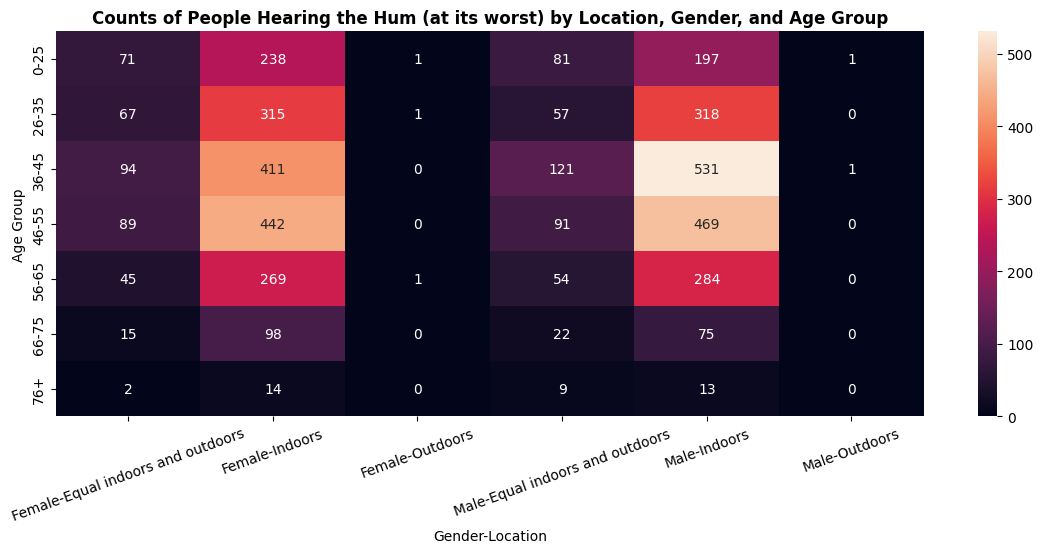

In [17]:
# Another heatmap, but pivoting on where_loudest

heatmap_gender_age_when = df_mf.pivot_table(
    values='count', 
    index='age_group', 
    columns=['gender', 'where_loudest'], 
    aggfunc='sum'
)

fig=plt.figure()
fig.set_size_inches(14,5)
sns.heatmap(heatmap_gender_age_when, annot=True, fmt="d")#, cmap="YlGnBu")  # Use decimal format.
plt.title("Counts of People Hearing the Hum (at its worst) by Location, Gender, and Age Group",
         fontweight="bold")
plt.xlabel("Gender-Location")
plt.ylabel("Age Group")
plt.xticks(rotation=20)
plt.show()

<div class="alert alert-block alert-info">
<h3>Observations</h3>
    <li> Universal agreement in worse loudness when Indoors - almost nobody surveyed found it worst outside.</li>
    <li> Strong agreement in both genders through the age bands in indoors only.</li>
</div>

----------------------------------------------------------------
# Symptoms
-----------------------------------------------------------------

* Relevant cols: symptoms_full_desc; Insomnia; Anxiety; Headache; Nausea; Sense of vibration; Ear discomfort; Annoyance; Stress
* How many symptoms did people experience?

#### What Symptoms are most commonly experienced?
What are the common words and phrases used?

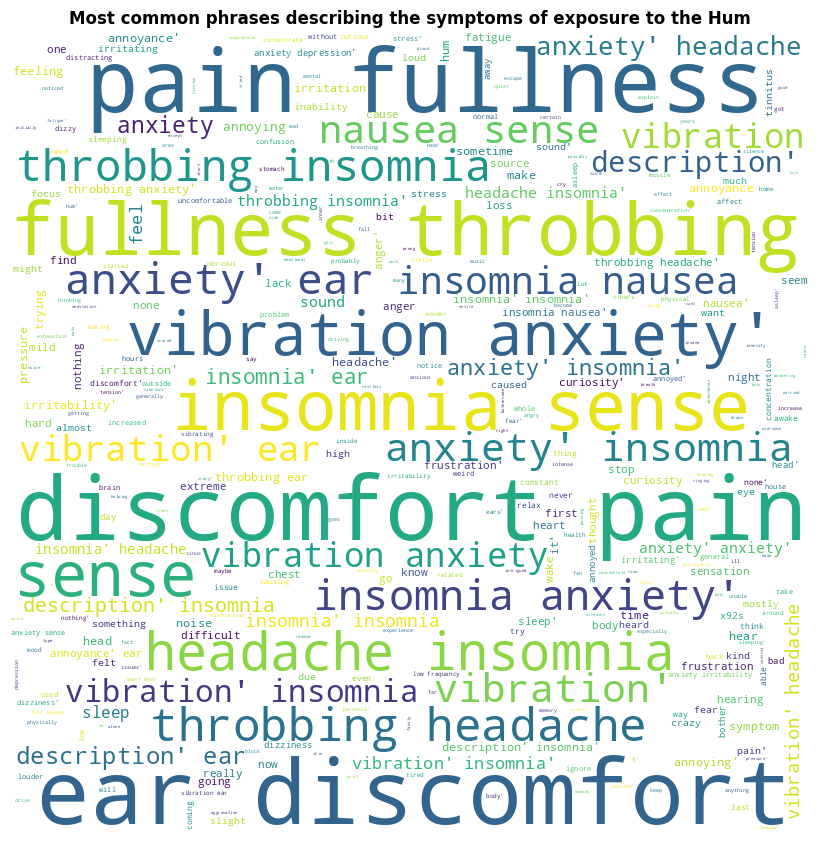

In [18]:
# Generate a word cloud of the symptoms description column
process_and_generate_wordcloud(df,
                               "symptoms_full_desc",
                              "Most common phrases describing the symptoms of exposure to the Hum",
                              "no repeat")


<div class="alert alert-block alert-info">
<h3>Symptom observations</h3>
    <li> Headache / head pain seems to be the most common</li>
    <li> Ear discomfort comes up more than pain - seems to be an irritation to listen to rather than painful</li>
    <li>General disturbance in the form of anxiety, insomnia - strong mental impacts as well as physical</li>
    <li>Some serious debilitating mental side effects apparent, though less common: depression; fear; anxiety; fatigue</li>
    <li>'Fullness' and 'Throbbing' consistently used to describe the sound experienced. </li>
</div>

In [19]:
symptom_cols = ["Nausea", "Insomnia", "Anxiety", "Headache", "Sense of vibration", "Ear discomfort", "Annoyance", "Stress"]

#### How common are the main symptoms experienced?

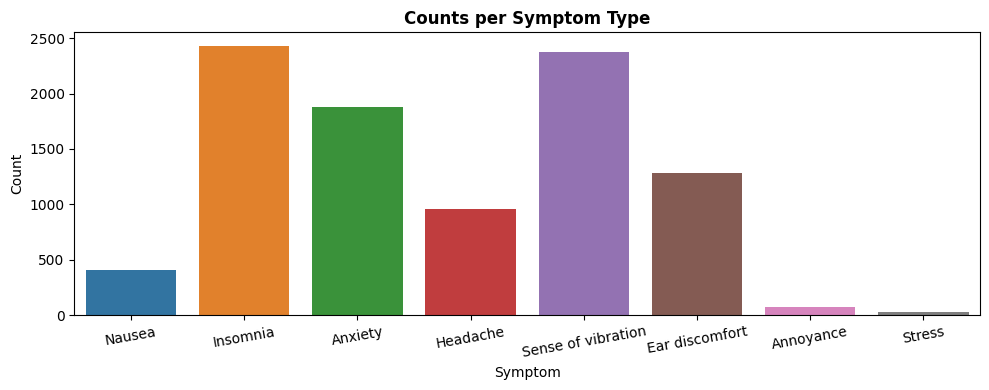

In [20]:
# Plot the overall counts of each major symptom type:
all_symptom_counts_dict = {col: df[col].sum() for col in symptom_cols}
all_symptom_counts_df = pd.DataFrame.from_dict([all_symptom_counts_dict])  # Wrap in a list to avoid: If using all scalar values, you must pass an index"

fig=plt.figure()
fig.set_size_inches(10,4)
sns.barplot(data=all_symptom_counts_df)
plt.title("Counts per Symptom Type",
         fontweight="bold")
plt.xlabel("Symptom")
plt.ylabel("Count")
plt.xticks(rotation=10)
plt.tight_layout()

#### Is there correlation between the symptoms reported?

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Nausea'),
  Text(1.5, 0, 'Insomnia'),
  Text(2.5, 0, 'Anxiety'),
  Text(3.5, 0, 'Headache'),
  Text(4.5, 0, 'Sense of vibration'),
  Text(5.5, 0, 'Ear discomfort'),
  Text(6.5, 0, 'Annoyance'),
  Text(7.5, 0, 'Stress')])

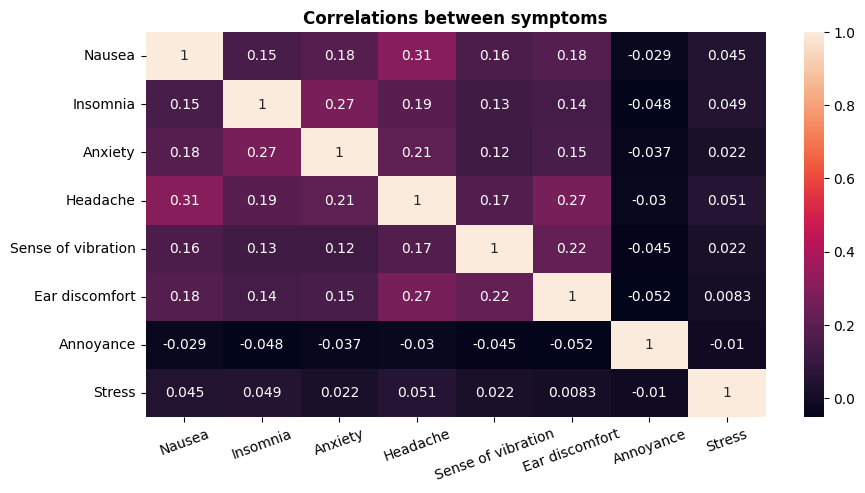

In [21]:
fig=plt.figure()
fig.set_size_inches(10,5)
sns.heatmap(df[symptom_cols].corr(),
           annot=True)
plt.title("Correlations between symptoms",
         fontweight="bold")
plt.xticks(rotation=20)

<div class="alert alert-block alert-info">
<h3>Symptom correlation observations</h3>
    <li> Annoyance and Stress are almost uncorrelated with any other symptoms. They were rarely reported.</li>
    <li> Headaches + Nausea were the most highly correlated. This is classic migraine symptoms.</li>
    <li>Anxiety and Insomnia were next mosty highly correlated along with headaches and ear discomfort.</li>
    <li>No symptoms were super highly correlated - the variability in multiple symptoms experienced is quite high.</li>
    <li>Interestingly 'annoyance' was very slightly negatively correlated with other symptoms. Those reporting annoyance from the sound perhaps have a different mental state and react differently to the noise, not recording any physical or mental symptoms other than being irritated by it. Perhaps they are less likely to report any other struggles they face.</li>
</div>

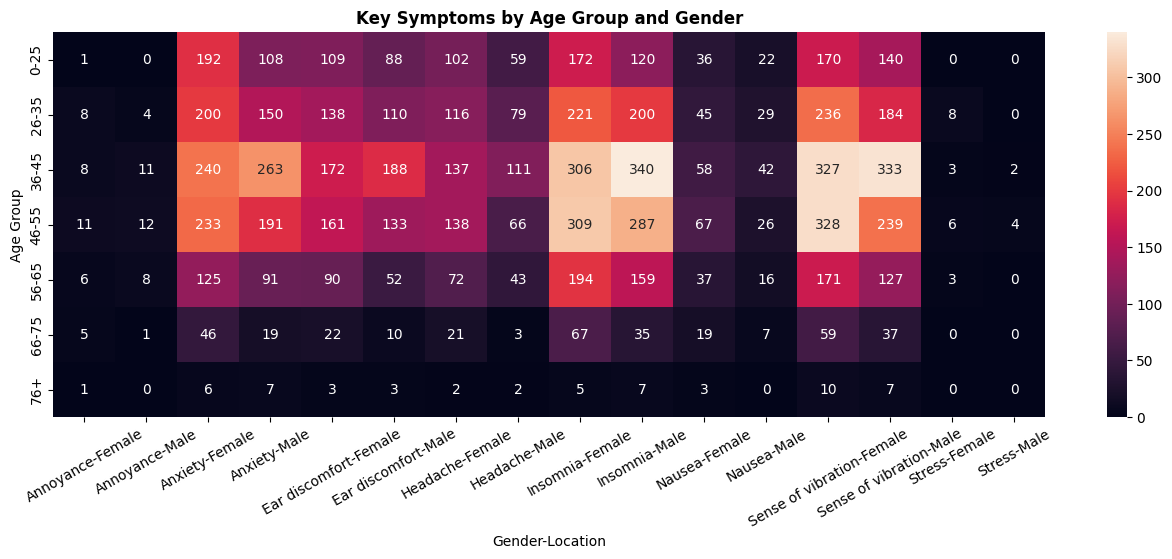

In [22]:
# Split symptom counts into male and female for each age group
symptoms_pivot_df = df_mf.pivot_table(index="age_group",
                                   values=symptom_cols,
                                   columns=["gender"],
                                  aggfunc="sum")
#symptoms_pivot_df
fig=plt.figure()
fig.set_size_inches(16,5)
sns.heatmap(symptoms_pivot_df, annot=True, fmt="d")#, cmap="YlGnBu")  # Use decimal format.
plt.title("Key Symptoms by Age Group and Gender",
         fontweight="bold")
plt.xlabel("Gender-Location")
plt.ylabel("Age Group")
plt.xticks(rotation=30)
plt.show()

<div class="alert alert-block alert-info">
<h3>Symptom counts observations</h3>
<li> Across all symptoms, women were far more likely to report symptoms, and in many cases had higher counts than men despite being a smaller proportion of the survey results - are women more liekly to report symptoms, or are they more suspecible to them</li>
<li> Anxiety was a common symptom, but far more commonly reported amongst women than Men. Could men be less likely to report feelings of anxiety?</li>
<li>Heaches were more commonly reported amongst women than men across all age categories also, though in the same age pattern.</li>
<li>No symptoms were super highly correlated - the variability in multiple symptoms experienced is quite high.</li>
<li>Insomnia was more commonly reported amongst women than men, though in the same age pattern.</li>
<li>Nausea more commonly reported amongst women than men.</li>
</div>

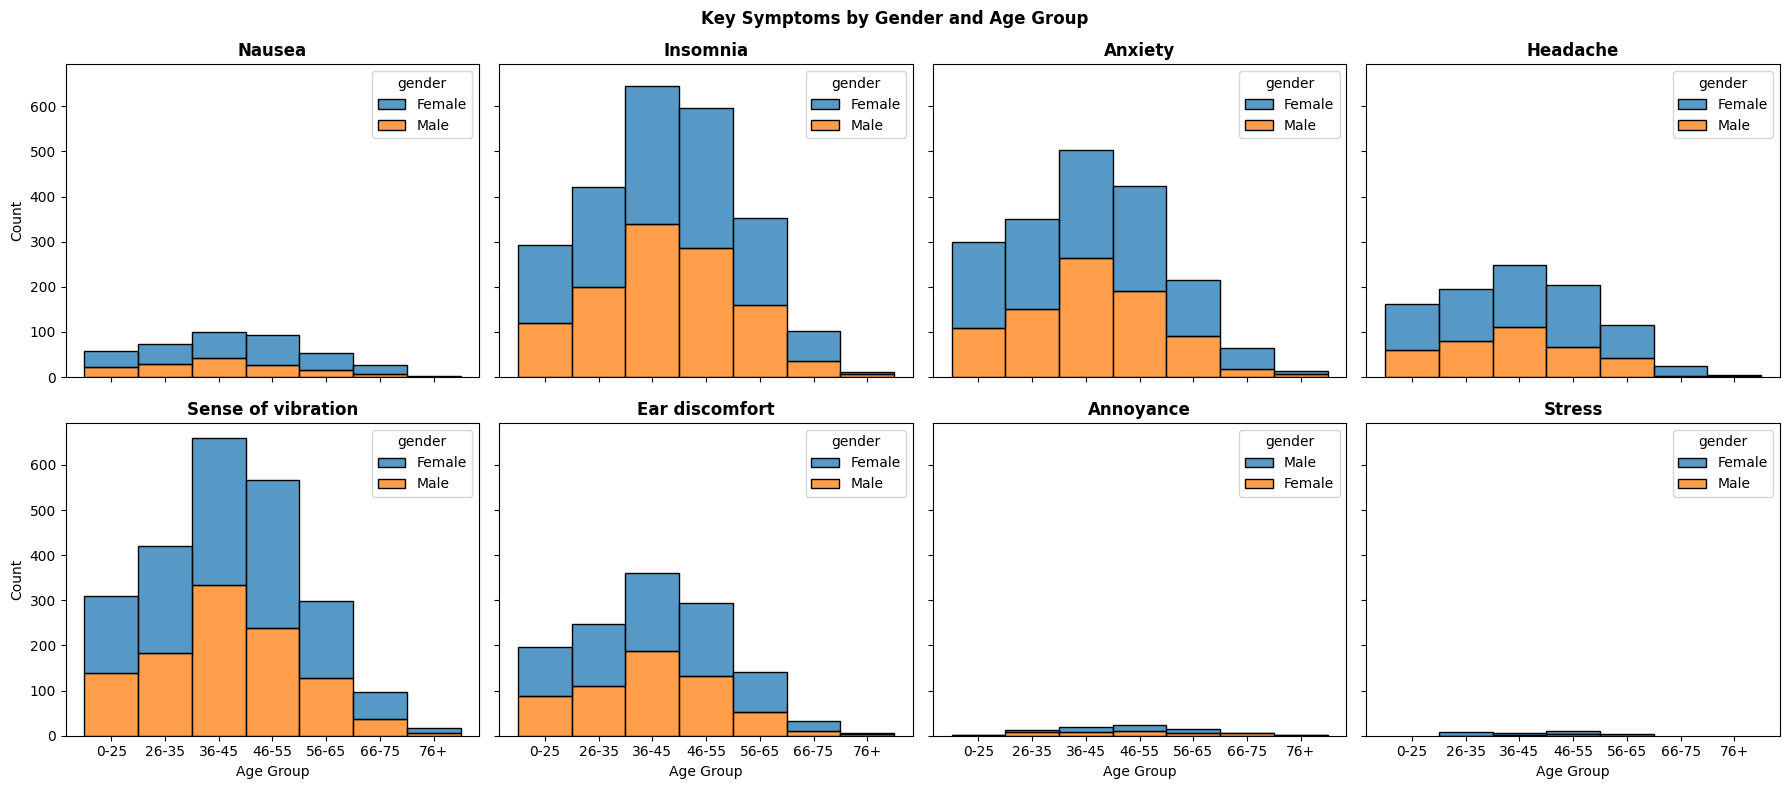

In [42]:
# Create a grid of histogram plots, one for each of the 8 key symptoms. x_axis being age group, y being count. Coloured by M/F
# This is to help visualize the above heatmap and highlight the male-female disparity.

fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[df_mf[column]==1],
                               x="age_group",
                               stat="count",
                               hue="gender",
                               ax=ax[row,col],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")

plt.suptitle("Key Symptoms by Gender and Age Group",
            fontweight="bold")
plt.tight_layout()
    
    
    

#### How many symptoms do people tend to have?

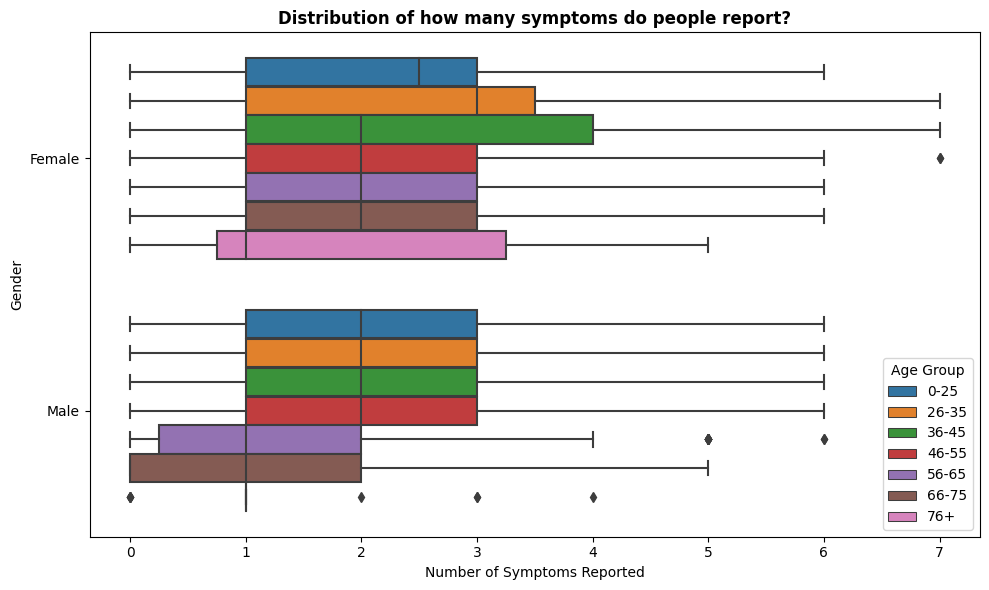

In [24]:
df["num_symptoms"] = df[symptom_cols].sum(axis=1, numeric_only=True)
df_mf["num_symptoms"] = df_mf[symptom_cols].sum(axis=1, numeric_only=True)

fig=plt.figure()
fig.set_size_inches(10,6)
box=sns.boxplot(data=df_mf,
             x="num_symptoms",
             y="gender",
             hue="age_group")
plt.title("Distribution of how many symptoms do people report?",
          fontweight="bold")
plt.xlabel("Number of Symptoms Reported")
plt.ylabel("Gender")
plt.legend(title="Age Group")
plt.tight_layout()

<div class="alert alert-block alert-info">
<h3>Symptom counts observations</h3>
<li> Women report more symptoms on average, though most respondents report 2</li>
<li> Younger age groups <45 seem to report more symptoms - perhaps they are more aware of, or sensitive to, mental side effects?</li>
</div>

#### Raw counts of symptoms reported:

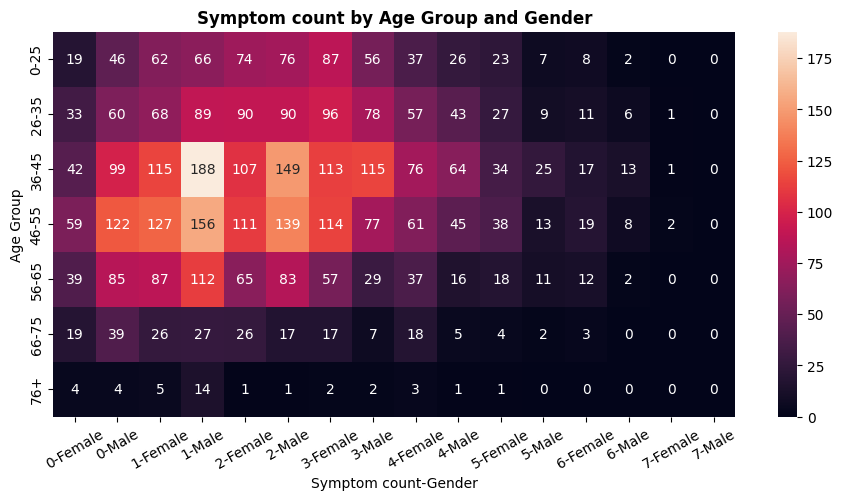

In [25]:
df_mf["num_symptoms"] = df_mf["num_symptoms"].astype("category")
symptom_count_pivot = df_mf.pivot_table(index="age_group",
                                             values="count",
                                             columns=["num_symptoms","gender"],
                                             aggfunc="sum")

fig=plt.figure()
fig.set_size_inches(11,5)

sns.heatmap(symptom_count_pivot, annot=True, fmt="d")
plt.title("Symptom count by Age Group and Gender",
         fontweight="bold")
plt.xlabel("Symptom count-Gender")
plt.ylabel("Age Group")
plt.xticks(rotation=30)
plt.show()

<div class="alert alert-block alert-info">
<h3>Symptom counts observations</h3>
<li> Clear skew to top left, being low counts of symptoms and younger age ranges</li>
<li> 0-25 Female outlier - Notably fewer young women reporting 0 symptoms.</li>
</div>

-----------------------------------------------------------------------------------
# Pre-emptive potentially influencing factors #
-----------------------------------------------------------------------------------

In [26]:
preemptive_cols = ["medical_issue", "currently_medicated", "antibiotic_flag", "soft_drinks_flag", "loud_work", "effort",
                  "medication_desc", "mental_disorder", "hearing_issue_desc"]

#### What is the medical background of those who have experienced the hum?

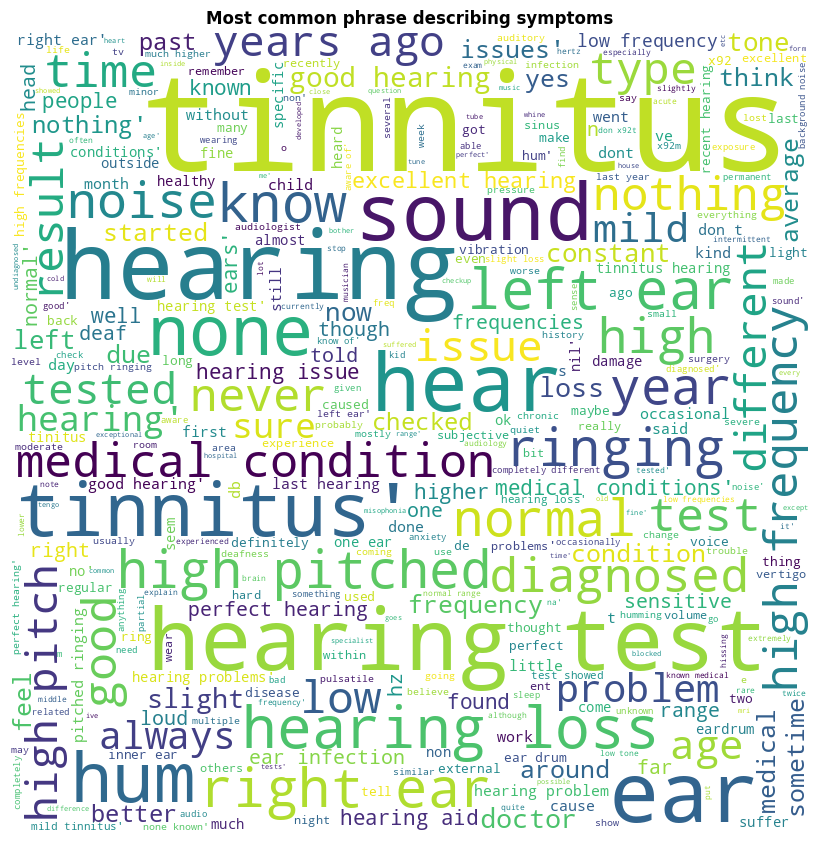

In [27]:
# Create a dataframe of people who have reported hearing issues
ignore_hearing_issues = ["No", "none", "No Description", np.nan, "no issues", "nothing"]
df_hearing_issues = df[~df["hearing_issue_desc"].isin(ignore_hearing_issues)]

# Generate wordcloud of these:
process_and_generate_wordcloud(df_hearing_issues,
                               "hearing_issue_desc",
                              "Most common phrase describing symptoms",
                              "no")

<div class="alert alert-block alert-info">
<h3>Hearing issues observations</h3>
<li> Quite a messy column with lots of variety in answers, reflected in the high number of 'large' (i.e., common) phrases.</li>
<li> Many individuals used this question to proclaim 'perfect' / 'excellent' hearing and/or high-scoring hearing tests.</li>
<li>Tinnitus is by far the most common issue reported.</li>
<li>Both the right and left ears similarly represented. Many people perhaps with issues in one single ear?</li>
</div>

#### Medical issues

Text(0.5, 0, 'Age Group')

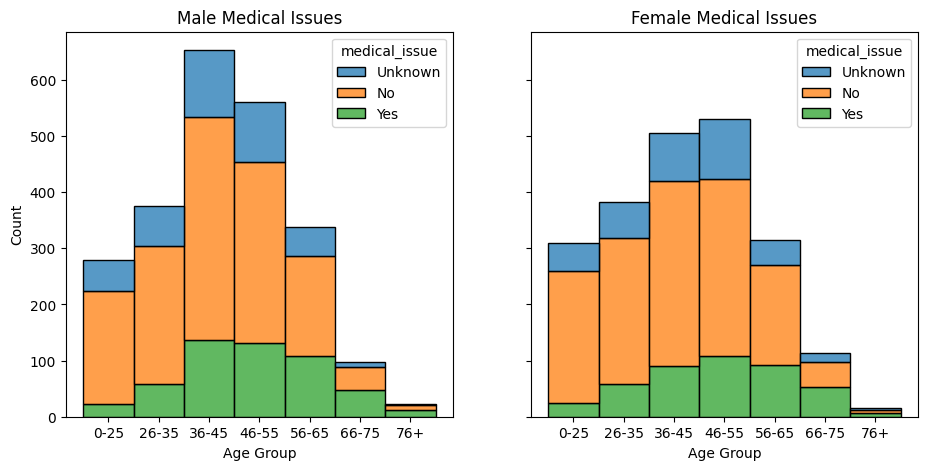

In [28]:
medical_issues = ["medical_issue", "currently_medicated", "antibiotic_flag","mental_disorder"]


fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                      sharex=True,
                      sharey=True)
fig.set_size_inches(11,5)

ax[0] = sns.histplot(data=df_mf[df_mf["gender"]=="Male"],
                     x="age_group",
                     stat="count",
                     hue="medical_issue",
                     ax=ax[0],
                     multiple="stack")

ax[1] = sns.histplot(data=df_mf[df_mf["gender"]=="Female"],
                     x="age_group",
                     stat="count",
                     hue="medical_issue",
                     ax=ax[1],
                    multiple="stack")

ax[0].set_title("Male Medical Issues")
ax[0].set_xlabel("Age Group")
ax[1].set_title("Female Medical Issues")
ax[1].set_xlabel("Age Group")

<div class="alert alert-block alert-info">
<h3>Medical issues observations</h3>
<li> In all but the 66+ age groups, most people report no medical issues</li>
<li>In women, the most common age with medical issues was 46-55 vs 36-45 in men. Slightly different distributions, with womens more normally distributed</li>
</div>

#### Who is currently medicated

In [29]:
df["currently_medicated"].unique()

array(['No current medication', 'Currently medicated'], dtype=object)

Text(0.5, 0.98, 'Who is currently medicated?')

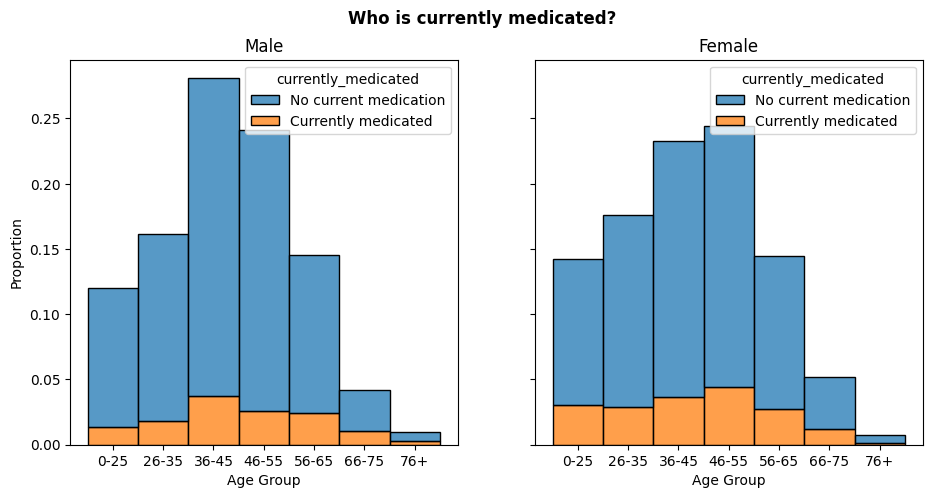

In [43]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                      sharex=True,
                      sharey=True)
fig.set_size_inches(11,5)

ax[0] = sns.histplot(data=df_mf[df_mf["gender"]=="Male"],
                     x="age_group",
                     stat="proportion",
                     hue="currently_medicated",
                     ax=ax[0],
                     multiple="stack")

ax[1] = sns.histplot(data=df_mf[df_mf["gender"]=="Female"],
                     x="age_group",
                     stat="proportion",
                     hue="currently_medicated",
                     ax=ax[1],
                     multiple="stack")

ax[0].set_title("Male")
ax[0].set_xlabel("Age Group")
ax[1].set_title("Female")
ax[1].set_xlabel("Age Group")
plt.suptitle("Who is currently medicated?",
            fontweight="bold")

<div class="alert alert-block alert-info">
<h3>Medical issues observations</h3>
<li> Medication use is higher in female and than male respondents - or at least reporting medication use. </li>
<li>Much higher medication use in younger female vs younger male respondents.</li>
</div>

#### Who is using antibiotics

Text(0.5, 0, 'Age Group')

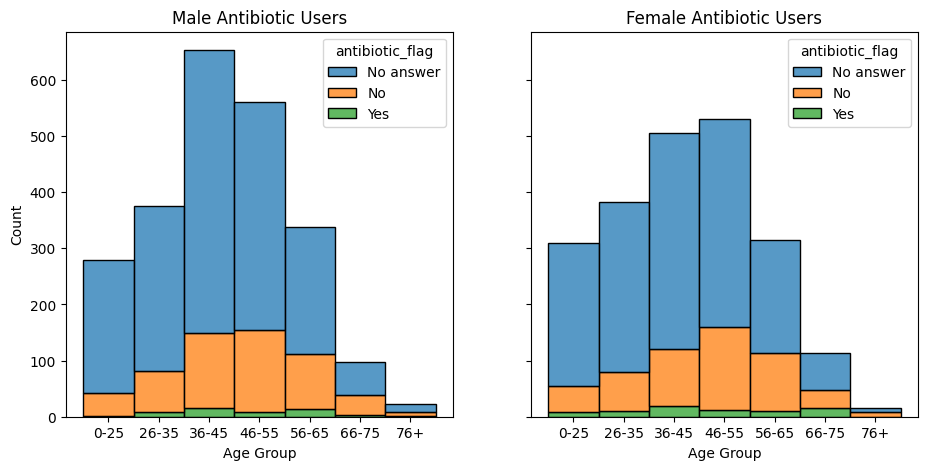

In [31]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                      sharex=True,
                      sharey=True)
fig.set_size_inches(11,5)

ax[0] = sns.histplot(data=df_mf[df_mf["gender"]=="Male"],
                     x="age_group",
                     stat="count",
                     hue="antibiotic_flag",
                     ax=ax[0],
                     multiple="stack")

ax[1] = sns.histplot(data=df_mf[df_mf["gender"]=="Female"],
                     x="age_group",
                     stat="count",
                     hue="antibiotic_flag",
                     ax=ax[1],
                     multiple="stack")

ax[0].set_title("Male Antibiotic Users")
ax[0].set_xlabel("Age Group")
ax[1].set_title("Female Antibiotic Users")
ax[1].set_xlabel("Age Group")

<div class="alert alert-block alert-info">
<h3>Antibioitic use observations</h3>
<li>Antibiotic use seems to be lower in Male than Females.</li>
<li>Higher antibiotic use in 0-25 and 66-75 women than men in particular.</li>
</div>

#### is there a prevalance of any Mental illness 

Text(0.5, 1.0, 'Prevalance of mental conditions amongst respondents')

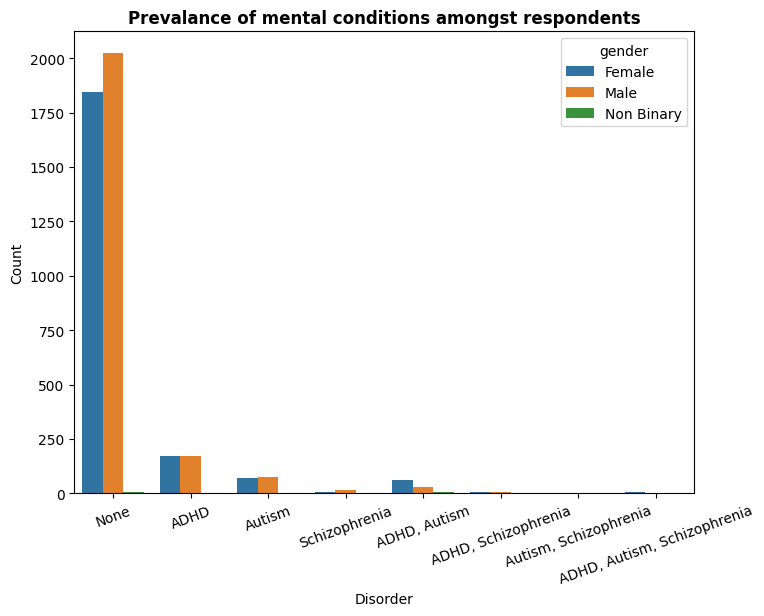

In [32]:
df["mental_disorder"] = df["mental_disorder"].fillna("None")
df["mental_disorder"].value_counts()

# Generate a horizontal bar plot of all
fig=plt.figure()
fig.set_size_inches(8,6)
sns.countplot(data=df,
              x="mental_disorder",
              hue="gender")#,
              #stat="proportion")
plt.xticks(rotation=20)
plt.xlabel("Disorder")
plt.ylabel("Count")
plt.title("Prevalance of mental conditions amongst respondents",
         fontweight="bold")


Text(0.9, 600, 'Proportion with: 14.19%')

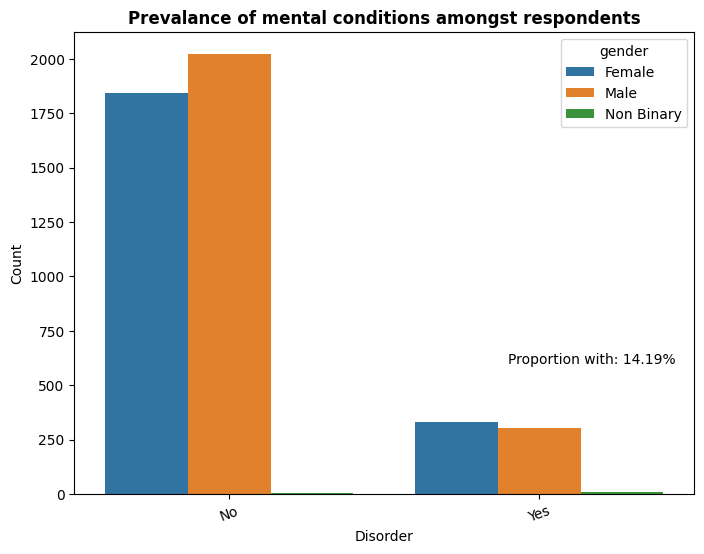

In [33]:
# Create a disorder flag column
df["disorder_flag"] = np.where(df["mental_disorder"] == "None", "No", "Yes")   


# Calculate proportions
proportion_disorder = (len(df[df["disorder_flag"]=="Yes"]) / (len(df[df["disorder_flag"]=="Yes"]) + len(df[df["disorder_flag"]=="No"]))) * 100


# Generate a horizontal bar plot of all
fig=plt.figure()
fig.set_size_inches(8,6)
sns.countplot(data=df,
              x="disorder_flag",
              hue="gender")
plt.xticks(rotation=20)
plt.xlabel("Disorder")
plt.ylabel("Count")
plt.title("Prevalance of mental conditions amongst respondents",
         fontweight="bold")
plt.text(x=0.9,
        y=600,
        s=f"Proportion with: {str(round(proportion_disorder, 2))}%")

<div class="alert alert-block alert-info">
<h3>Mental disorders observations</h3>
<li>Women were more likely to have, be diagnosed with, or at least report a mental disorder</li>
<li>~15% reported a mental disorder. This is a much higher prevalance than the global average - where ADHD is prevalent in ~2.5% of adults, Schizophrenia in 1%, and Autism in ~1%</li>
</div>

#### Mental Disorder and Symptoms
Is there a noticeable difference in symptoms experienced by those with and without mental disorders?

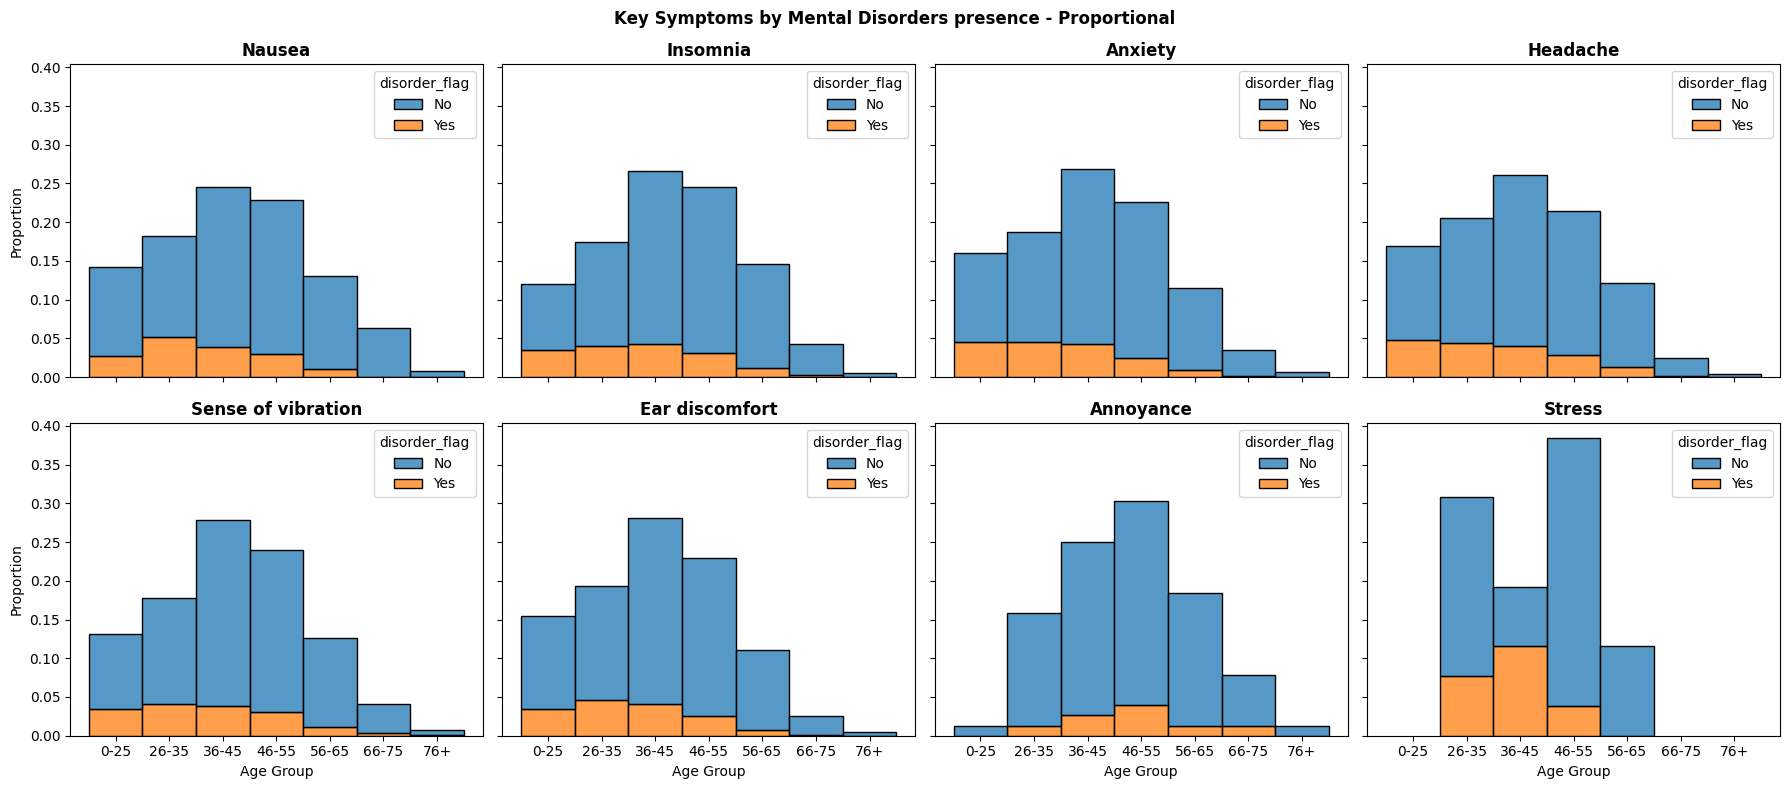

In [34]:
# Add the disorder flag back to the df_mf dataset:
# Create a disorder flag column
df_mf["mental_disorder"] = df_mf["mental_disorder"].fillna("None")
df_mf["disorder_flag"] = np.where(df_mf["mental_disorder"] == "None", "No", "Yes")   

fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[df_mf[column]==1],
                               x="age_group",
                               stat="proportion",
                               hue="disorder_flag",
                               ax=ax[row,col],
                              hue_order=["No", "Yes"],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")
    ax[row,col].set_ylabel("Proportion")
    

plt.suptitle("Key Symptoms by Mental Disorders presence - Proportional",
            fontweight="bold")
plt.tight_layout()
    

<div class="alert alert-block alert-info">
<h3>Mental disorders and symptoms observations</h3>
<li>Those with mental disorders seem to experience their highest proportions of symptoms at a younger age compared and decreasing with age, against those without mental disorders who experience symptoms in their highest proportions at middle-aged groups.</li>
<li>Stress was more common amongst those with disorders than other symptoms, and in the 36-45 age group was more common than those without. There seems to be a high correlation between mental disorder prescence and stress caused by the hum. </li>
</div>

##### Does gender affect the above relationships between mental disorder presence and proportions with certain symptoms?

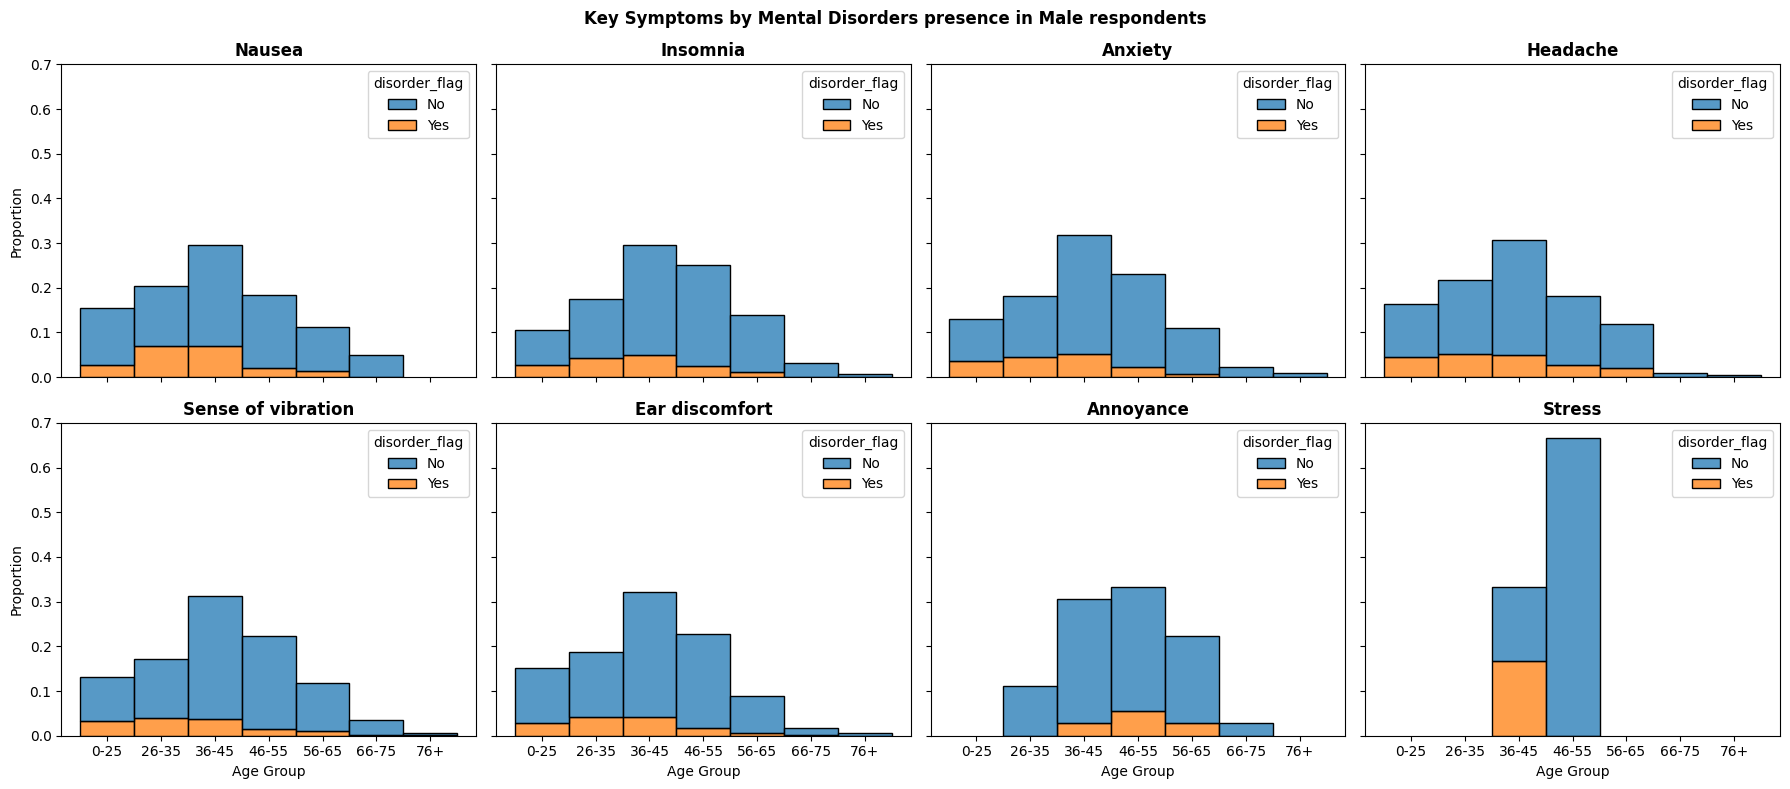

In [35]:
# Male respondents, age group and mental disorder presence proportion of each symptomn
fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[(df_mf[column] == 1) & (df_mf["gender"] == "Male")],
                               x="age_group",
                               stat="proportion",
                               hue="disorder_flag",
                               ax=ax[row,col],
                              hue_order=["No", "Yes"],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")
    ax[row,col].set_ylabel("Proportion")
    

plt.suptitle("Key Symptoms by Mental Disorders presence in Male respondents",
            fontweight="bold")
plt.tight_layout()

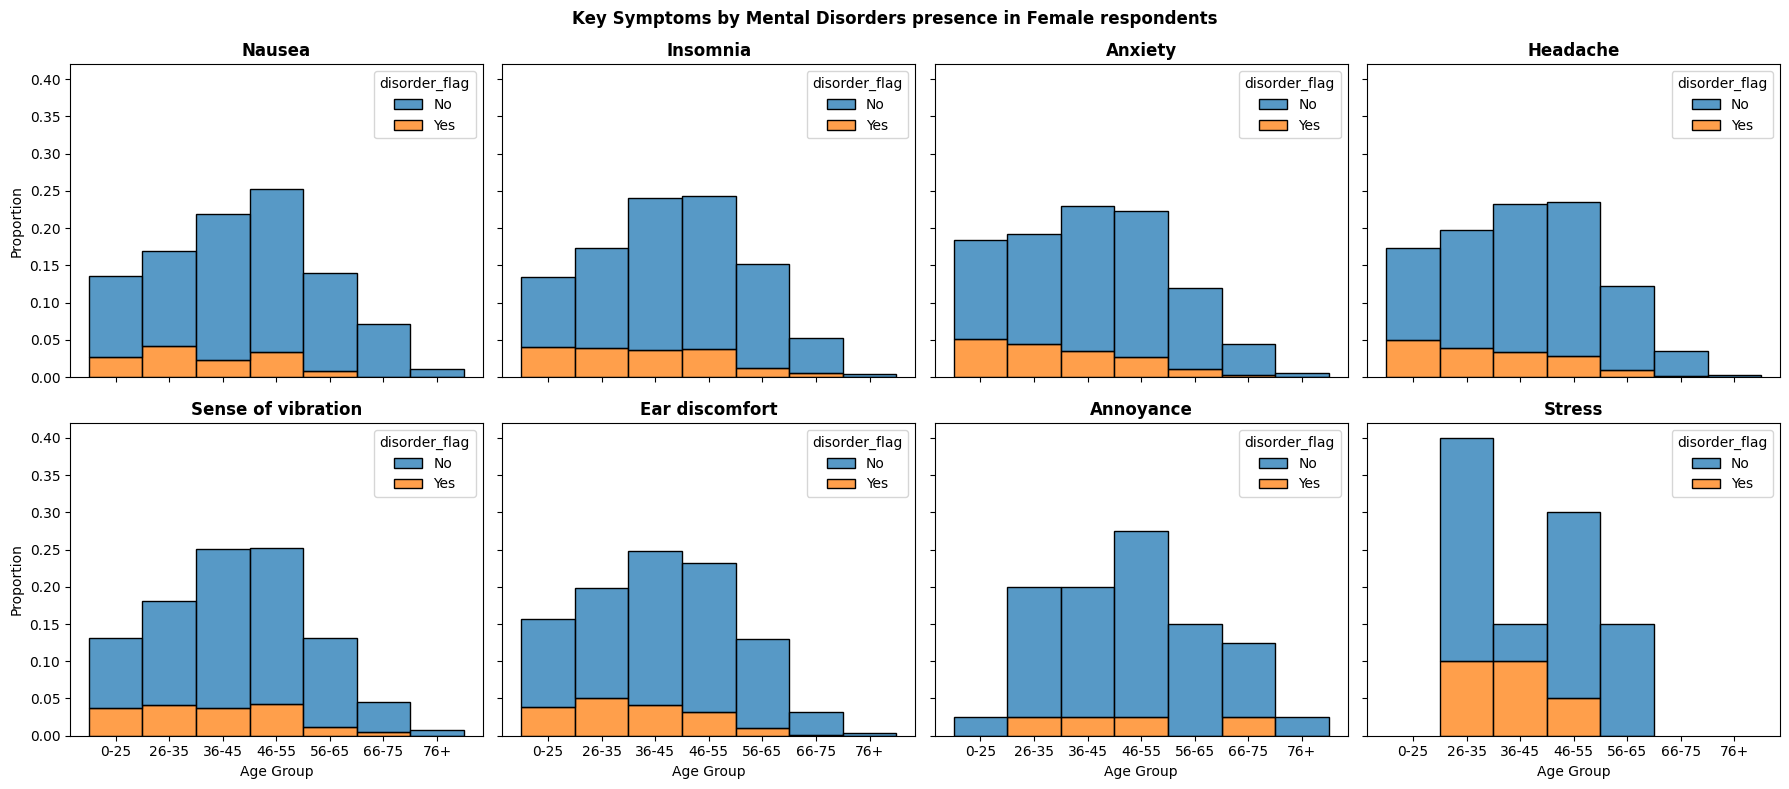

In [36]:
# Male respondents, age group and mental disorder presence proportion of each symptomn
fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[(df_mf[column] == 1) & (df_mf["gender"] == "Female")],
                               x="age_group",
                               stat="proportion",
                               hue="disorder_flag",
                               ax=ax[row,col],
                              hue_order=["No", "Yes"],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")
    ax[row,col].set_ylabel("Proportion")
    

plt.suptitle("Key Symptoms by Mental Disorders presence in Female respondents",
            fontweight="bold")
plt.tight_layout()

<div class="alert alert-block alert-info">
<h3>Mental disorders, gender and symptoms observations</h3>
<li>Symtoms experienced by women with mental disorders tended to experience them in higher proportions and more consistently across each age group compared to men who peaked in younger age groups. </li>
<li>Stress more common in younger women than men</li>
</div>

#### How does exposure to loud working environments link to the Hum experience?

Text(0.5, 1.0, 'Prevalance of previous loud work environment amongst respondents')

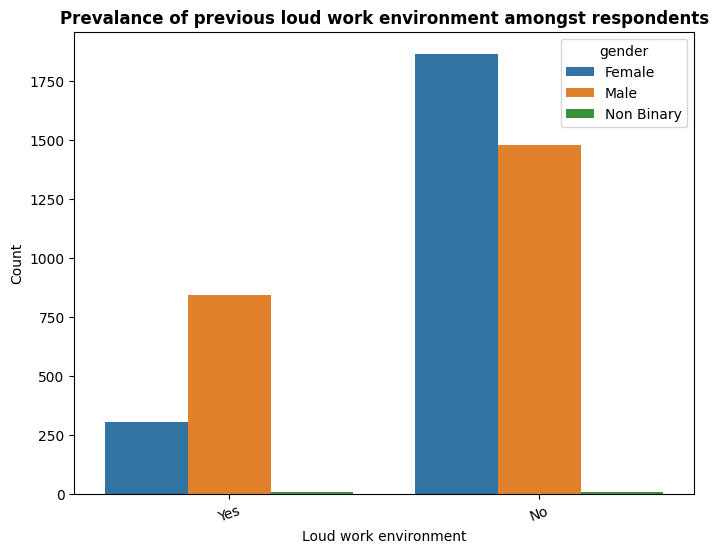

In [37]:
# Loud work and counts amongst respondents.
fig=plt.figure()
fig.set_size_inches(8,6)
sns.countplot(data=df,
              x="loud_work",
              hue="gender")
plt.xticks(rotation=20)
plt.xlabel("Loud work environment")
plt.ylabel("Count")
plt.title("Prevalance of previous loud work environment amongst respondents",
          fontweight="bold")


<div class="alert alert-block alert-info">
<h3>Loud work experience and gender</h3>
<li>Roughly 1/3 of male respondents reported working in a loud environment previously</li>
<li>Roughly 1/10th of female respondents reported working in a loud environment previously</li>
</div>

##### How does loud work experience link to symptoms experienced

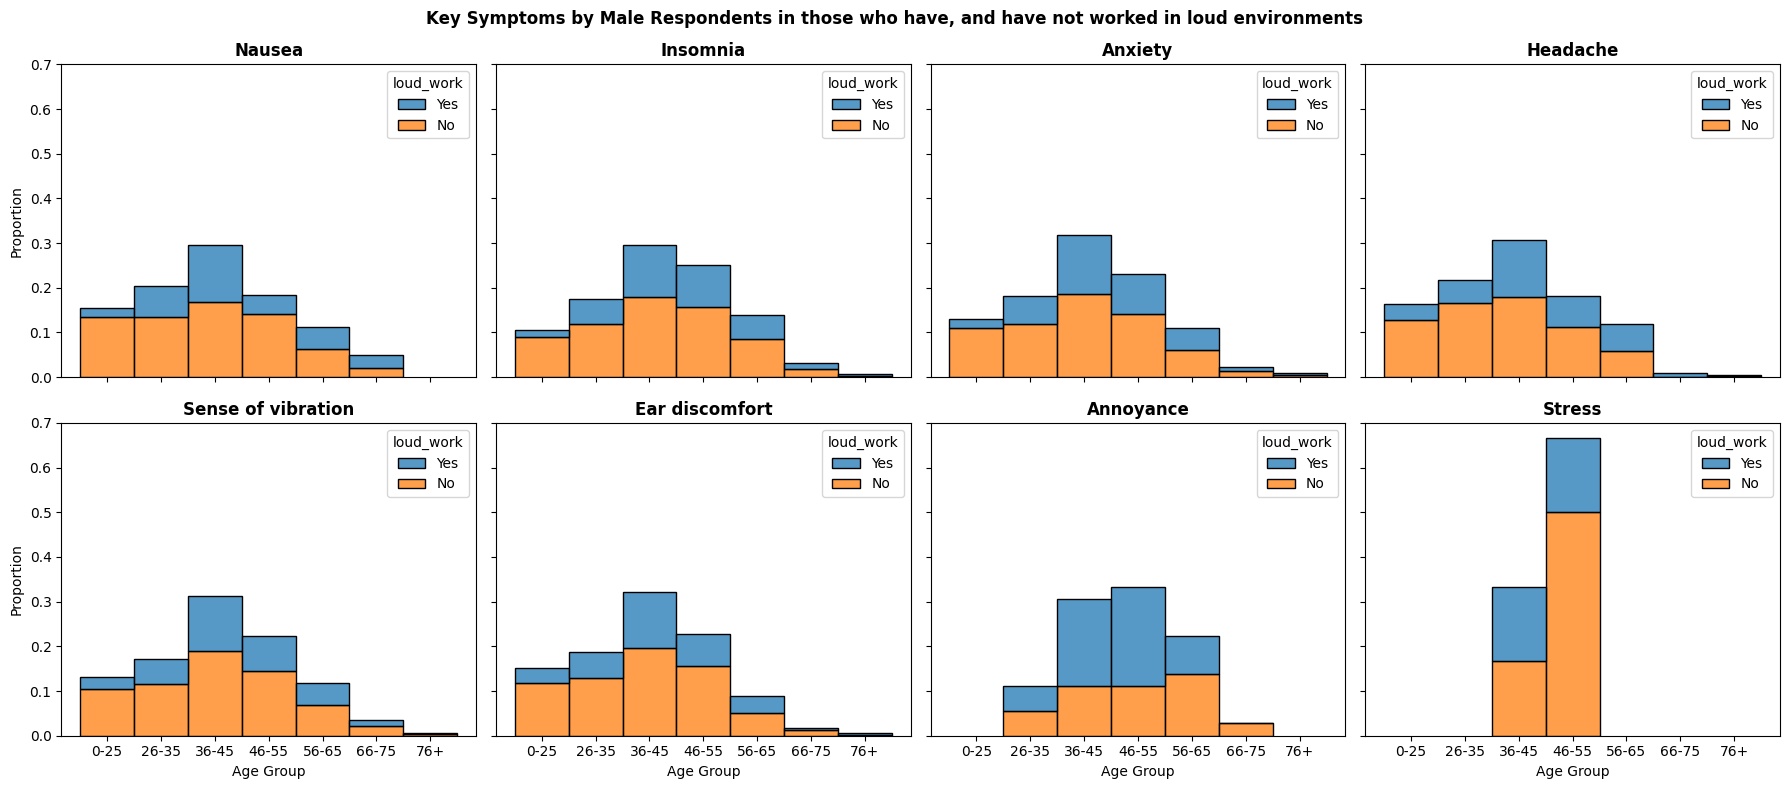

In [38]:
fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[(df_mf[column] == 1) & (df_mf["gender"] == "Male")],
                               x="age_group",
                               stat="proportion",
                               hue="loud_work",
                               ax=ax[row,col],
                               hue_order=["Yes", "No"],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")
    ax[row,col].set_ylabel("Proportion")
    

plt.suptitle("Key Symptoms by Male Respondents in those who have, and have not worked in loud environments",
            fontweight="bold")
plt.tight_layout()

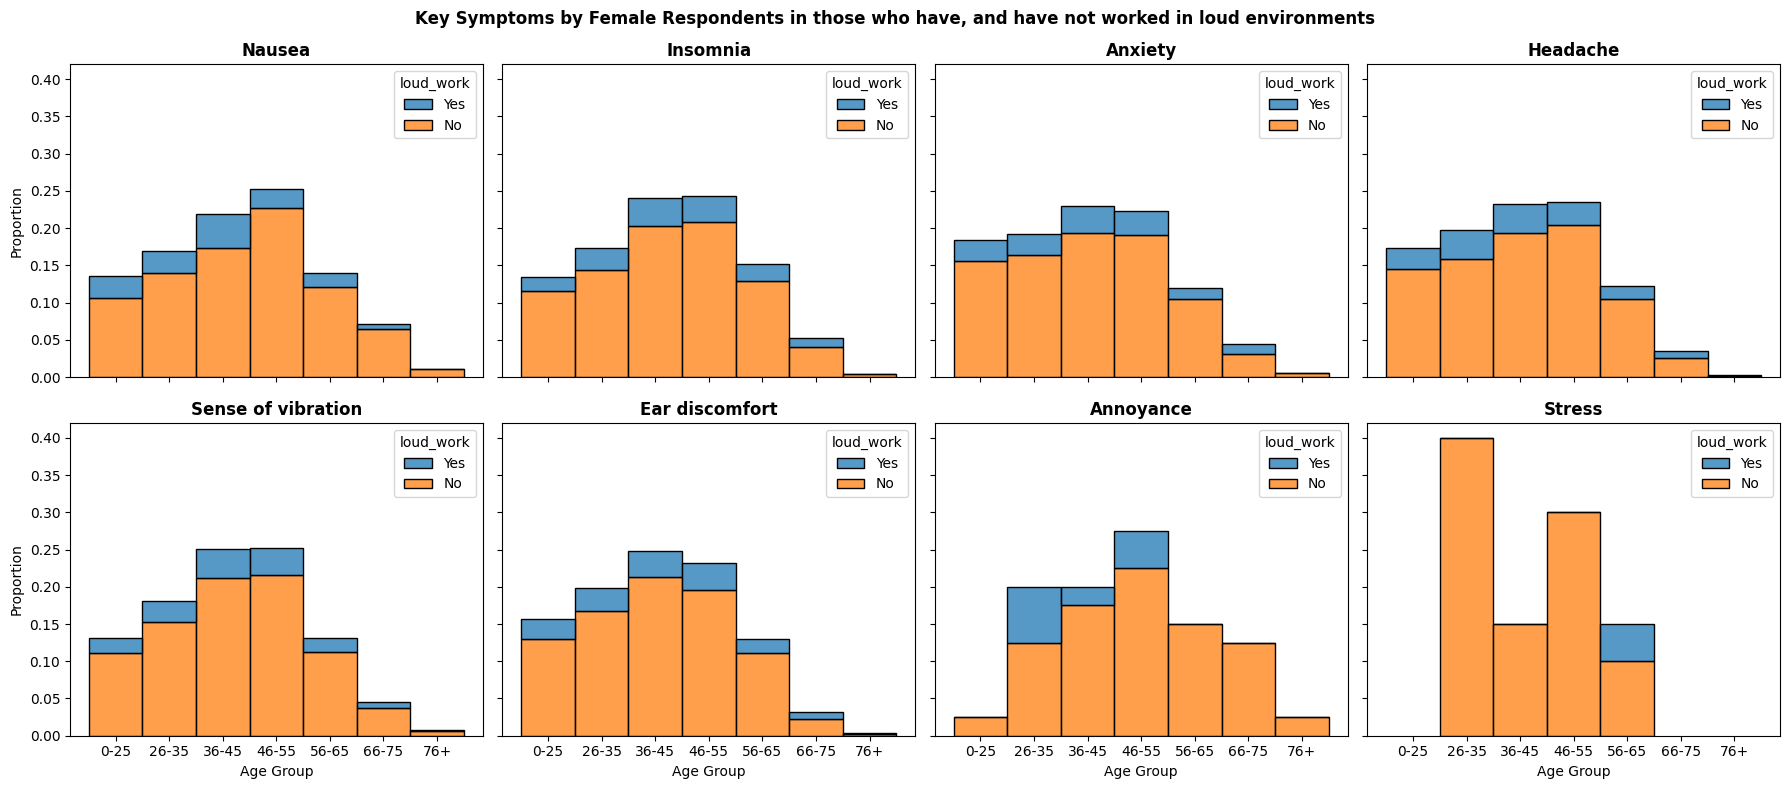

In [39]:
fig, ax = plt.subplots(nrows=2,
                       ncols=4,
                       sharex=True,
                       sharey=True)

fig.set_size_inches(18,8)

row=0
col=-1
for column in symptom_cols:
    col+=1
    if col>3:
        row+=1
        col=0
    ax[row,col] = sns.histplot(df_mf[(df_mf[column] == 1) & (df_mf["gender"] == "Female")],
                               x="age_group",
                               stat="proportion",
                               hue="loud_work",
                               ax=ax[row,col],
                               hue_order=["Yes", "No"],
                              multiple="stack")
    ax[row,col].set_title(f"{column}",
                         fontweight="bold")
    ax[row,col].set_xlabel("Age Group")
    ax[row,col].set_ylabel("Proportion")
    

plt.suptitle("Key Symptoms by Female Respondents in those who have, and have not worked in loud environments",
            fontweight="bold")
plt.tight_layout()

<div class="alert alert-block alert-info">
<h3>Loud work experience and gender</h3>
<li>Annoyance seems unusually common symptom amongst those who have worked in loud environments</li>
<li>Generally not much difference in symptom reporting between those have have against those who havent worked in loud environments</li>
<li>Men are more likely to report symptoms if they have previously worked in a loud environment, though women seems very minimal difference</li>
</div>

----------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------
<div class="alert alert-block alert-info">
<h2>Overall observations</h2>
<li>The sound experienced is very consistently low frequency and sounds like a rumbling engine.</li>
<li>Consistently reported more frequently at night, and inside</li>
<li>Women seem to experience more numerous and severe symptoms, or at least more likely to report them</li>
<li>There may be some connections to mental disorder, medication-use, and previous loud work experience, though gender and age appears to be greater factor in determining the number and types of symptoms experienced</li>
</div>
-------------------------------------------------------------------------------------------------------------------------------------------------

<div class="alert alert-block alert-info">
<h2>Caveats and biases</h2>
<li>Selection bias - There may be others who have experienced the hum, but have not taken the effort to search for (and) fill in a questionairre on it. Also biased towards those in richer areas ('the global North'), likely with better and freeer internet access. Also likely to miss out an older audience and younger individuals are more likely to be using the internet and researching such issues</li>
<li>Men are less likely than women to report mental and physical health issues</li>
</div>
